# Why Numpy



## 效能

In [10]:
# Numpy array 和list的差別

import numpy as np
from time import time
import sys

size = 1000000
lst = list(range(size))
arr = np.arange(size)

In [2]:
start = time()
for i in range(size):
    lst[i]+= 1
print(time() - start)

0.3848297595977783


In [3]:
start = time()
arr += 1
print(time() - start)

0.06489920616149902


In [44]:
print(sys.getsizeof(1) * len(lst))
print(arr.itemsize * arr.size)

2800000
80


## 建立ndarray

In [5]:
np.array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

In [7]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [9]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [11]:
np.full((5), "hi")

array(['hi', 'hi', 'hi', 'hi', 'hi'], dtype='<U2')

In [53]:
arr = np.arange(10)
mat = np.arange(25).reshape((5, 5))
to_operate = np.array((1, 2) * 5)

In [54]:
print(to_operate)

[1 2 1 2 1 2 1 2 1 2]


### 基本運算

In [15]:
print(arr + 1, arr + np.ones(10).astype(int), sep='\n')

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]


In [50]:
print(arr - to_operate)

[-1 -1  1  1  3  3  5  5  7  7]


In [56]:
print(arr * to_operate)

[ 0  2  2  6  4 10  6 14  8 18]


In [57]:
print(arr / to_operate)

[0.  0.5 2.  1.5 4.  2.5 6.  3.5 8.  4.5]


In [61]:
print(arr * arr )

[ 0  1  4  9 16 25 36 49 64 81]


### index / slice

In [21]:
print(arr[0], arr[-1], arr[1: 5])

0 9 [1 2 3 4]


In [22]:
#每兩個取一次
print(arr[0], arr[-1], arr[1: 5: 2])

0 9 [1 3]


In [23]:
#倒著取
print(arr[0], arr[-1], arr[:: -1])

0 9 [9 8 7 6 5 4 3 2 1 0]


In [26]:
print(mat)
print(mat[0, 0])
print(mat[4: 1: -1, 1: 4])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
0
[[21 22 23]
 [16 17 18]
 [11 12 13]]


In [30]:
# 兩個只標示指向同一個位置，值會被一起改變
# 取用時可以用copy
tmp = mat[1: 4, 1: 4]
print(mat)
tmp[1, 1] = 1000
print(tmp)
print(mat)


[[   0    1    2    3    4]
 [   5    6    7    8    9]
 [  10   11 1000   13   14]
 [  15   16   17   18   19]
 [  20   21   22   23   24]]
[[   6    7    8]
 [  11 1000   13]
 [  16   17   18]]
[[   0    1    2    3    4]
 [   5    6    7    8    9]
 [  10   11 1000   13   14]
 [  15   16   17   18   19]
 [  20   21   22   23   24]]


### Mask / where

In [32]:
mat[mat > 100]

array([1000])

In [34]:
print(mat > 100)
mask = np.array([])

mat[mask]

[[False False False False False]
 [False False False False False]
 [False False  True False False]
 [False False False False False]
 [False False False False False]]


In [35]:
mask = (mat > 10) & (mat < 20)
mat[mask]

array([11, 13, 14, 15, 16, 17, 18, 19])

In [37]:
mask = ~mask
mat[mask]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       1000,   20,   21,   22,   23,   24])

In [39]:
mask = mask | True
mat[mask]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11, 1000,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24])

In [41]:
np.where((mat > 10) & (mat < 20), mat, 2 * mat)

array([[   0,    2,    4,    6,    8],
       [  10,   12,   14,   16,   18],
       [  20,   11, 2000,   13,   14],
       [  15,   16,   17,   18,   19],
       [  40,   42,   44,   46,   48]])

In [43]:
np.where((mat > 10) & (mat < 20), 1, 2)

array([[2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 1, 2, 1, 1],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

### 陣列操作

In [73]:
arr = arr.reshape((-1, 5))
print(arr.shape)
print(arr)
print(np.vstack((arr, mat)))
arr = arr.reshape((5, -1))
print(arr)
print(np.hstack((arr, mat)))

(2, 5)
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[ 0  1  0  1  2  3  4]
 [ 2  3  5  6  7  8  9]
 [ 4  5 10 11 12 13 14]
 [ 6  7 15 16 17 18 19]
 [ 8  9 20 21 22 23 24]]


In [70]:
arr = arr.flatten()
print(arr)
print(arr.reshape((2, -1, 1)))
arr = np.squeeze(arr.reshape(2, -1, 1))
print(arr)


[0 1 2 3 4 5 6 7 8 9]
[[[0]
  [1]
  [2]
  [3]
  [4]]

 [[5]
  [6]
  [7]
  [8]
  [9]]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


### 代數運算

In [74]:
arr = arr.flatten()
print(arr)
print(np.inner(arr, arr))
print(np.dot(mat, mat))
print(np.matmul(mat, mat), mat @ mat, sep='\n')
print((mat.T))

[0 1 2 3 4 5 6 7 8 9]
285
[[ 150  160  170  180  190]
 [ 400  435  470  505  540]
 [ 650  710  770  830  890]
 [ 900  985 1070 1155 1240]
 [1150 1260 1370 1480 1590]]
[[ 150  160  170  180  190]
 [ 400  435  470  505  540]
 [ 650  710  770  830  890]
 [ 900  985 1070 1155 1240]
 [1150 1260 1370 1480 1590]]
[[ 150  160  170  180  190]
 [ 400  435  470  505  540]
 [ 650  710  770  830  890]
 [ 900  985 1070 1155 1240]
 [1150 1260 1370 1480 1590]]
[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


In [77]:
print(arr.min(), arr.max())
print(arr.argmin(), arr.argmax())
print(arr.mean(), arr.std())


0 9
0 9
4.5 2.8722813232690143


In [82]:
print(np.unique(mat, return_counts=True))
print(np.cumsum(arr))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1]))
[ 0  1  3  6 10 15 21 28 36 45]


In [6]:
loop_count = int(1e5)
lst = list(range(loop_count))
arr = np.arange(loop_count)

In [ ]:
lst[:10]

In [ ]:
arr[:10]

In [ ]:
type(arr)

In [ ]:
arr.shape

In [46]:
def py_ver(array_like, cnt):
    for i in range(cnt):
        array_like[i] += i

def numpy_ver(array_like, cnt):
    array_like += 1

In [47]:
loop_count = int(1e6)
lst = list(range(loop_count))
arr = np.arange(loop_count)

# 執行3次 取最佳值
%timeit -n 3 py_ver(lst, loop_count) 

%timeit -n 3 numpy_ver(arr, loop_count)

191 ms ± 85.8 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)
1.68 ms ± 691 µs per loop (mean ± std. dev. of 7 runs, 3 loops each)


1 ms = 1000 µs

In [ ]:
%prun py_ver(lst, 10000)

In [ ]:
print(sys.getsizeof(1) * len(lst))
print(arr.itemsize * arr.size)
print(sys.getsizeof(arr))

## 數學運算

In [ ]:
a = [1, 3, 5]
b = [100, 99, 98]
c = [[5, 6], [7, 8]]

In [ ]:
print(f'a = {a}')
print(f'a + b = {a + b}')
print(f'a - b = {a - b}')
print(f'a * b = {a * b}')
print(f'a + 2 = {a + 2}')

In [ ]:
import numpy as np

a = np.array(a)
b = np.array(b)

In [65]:
# question

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

v = np.array([1, 0, 1])

y = np.empty_like(x)

for i in range(4):
    y[i, :] = x[i, :] + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


# 影像處理實作

In [7]:
!pip install opencv-python==4.5.1.48

     |████████████████████████████████| 40.3 MB 136 kB/s 


In [10]:
!pip install path

In [8]:
import cv2

Matplotlib is building the font cache; this may take a moment.


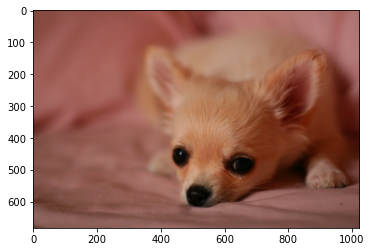

In [1]:
import path
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./data/Chihuahua.jpeg')
plt.imshow(img[:, :, ::-1])
plt.show()

In [2]:
gray_img = img[0:, :, 0]*0.114 + img[0:, :, 0]*0.1

# Image Tasks

- [CC search](https://search.creativecommons.org/)
- [Google 搜尋說明：尋找可以使用及分享的圖片](https://support.google.com/websearch/answer/29508?hl=zh-Hant)
- [[設計]創用 CC 授權圖片搜尋引擎@線上查詢照片版權‧CC0下載商業用途最安全](https://funtory.tw/search-cc/)
- [Chihuahua](https://search.creativecommons.org/photos/183ce3dc-0838-4292-9ace-35ca68b3b5d6)


## Load

用 [Creative Commons Search](https://search.creativecommons.org/)  找幾個圖片檔案試試，關鍵字可以用 Chihuahua, softness, lego 等等。 

In [ ]:
# ![](https://live.staticflickr.com/2653/3727916698_f2dac757af_b.jpg)

In [3]:
from os import path

data_dir = './data/'
chihuahua = path.join(data_dir, 'Chihuahua.jpeg')
softness = path.join(data_dir, 'softness.jpeg')
flower = path.join(data_dir, 'flower.jpeg')
cat = path.join(data_dir, 'cat.jpeg')

In [4]:
path.exists(chihuahua)

True

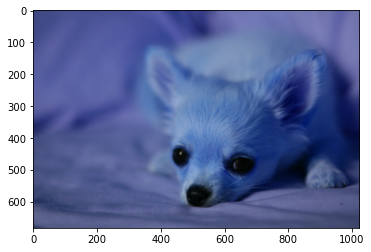

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(chihuahua)
plt.imshow(img)
plt.show()

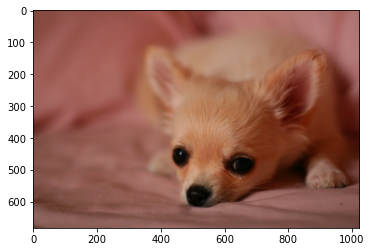

In [6]:
plt.imshow(img[:, :, ::-1]) # OpenCV is BGR, Pillow is RGB
plt.show()

In [7]:
type(img)

numpy.ndarray

In [8]:
img.shape # --> height, width, channel

(683, 1024, 3)

In [11]:
width = np.size(img, 0)
height = np.size(img, 1)
channel = np.size(img, 2)

width, height, channel

(683, 1024, 3)

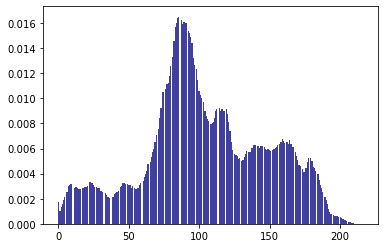

In [12]:
img = cv2.imread(chihuahua)

plt.hist(img.ravel(), bins=256, facecolor='navy', density=1, alpha=0.75)
plt.show()

## Gray Scale


- [Image Processing 101 Chapter 1.3: Color Space Conversion](https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/)
- [Grayscale to RGB Conversion](https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm)

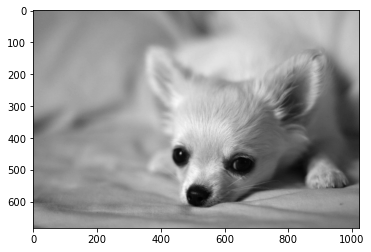

In [13]:
gray_image = img[:, :, 0] * 0.114 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.299
plt.imshow(gray_image, cmap='gray')

In [14]:
gray_image.shape

(683, 1024)

## Horizontal flip

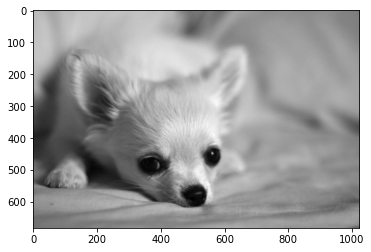

In [15]:
plt.imshow(gray_image[:, ::-1], cmap='gray')

## Contrast Enhancement

- [【OpenCV】8 – 運用 OpenCV 改變圖片的對比度 modify contrast (內含：網路上常見錯誤調整對比度方式的分析)](https://www.wongwonggoods.com/python/python_opencv/opencv-modify-contrast/)

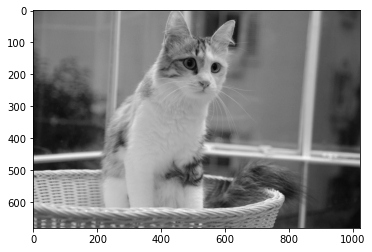

In [16]:
img = cv2.imread(cat, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

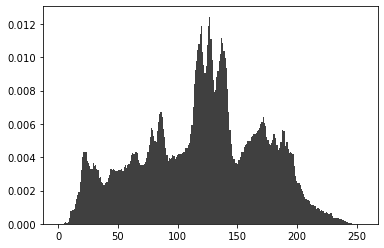

In [17]:
plt.hist(img.ravel(), bins=256, density=1, facecolor='black', alpha=0.75)
plt.show()

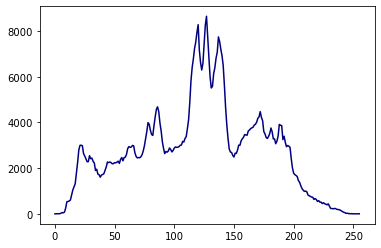

In [18]:
import numpy as np
from collections import Counter

hist = sorted(Counter(img.ravel()).items())

plt.plot(
    [x[0] for x in hist], [x[1] for x in hist], c='navy'
)

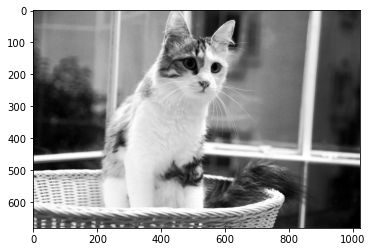

In [19]:
pixel_values, count = np.unique(img, return_counts=True)
cum_count = np.cumsum(count)

new_image = np.zeros(img.shape)

for i, pixel_value in enumerate(pixel_values):
    new_image[img == pixel_value] = \
        ((cum_count[i] - cum_count[0]) / (cum_count[-1] - cum_count[0])) * 255
plt.imshow(new_image, cmap='gray')

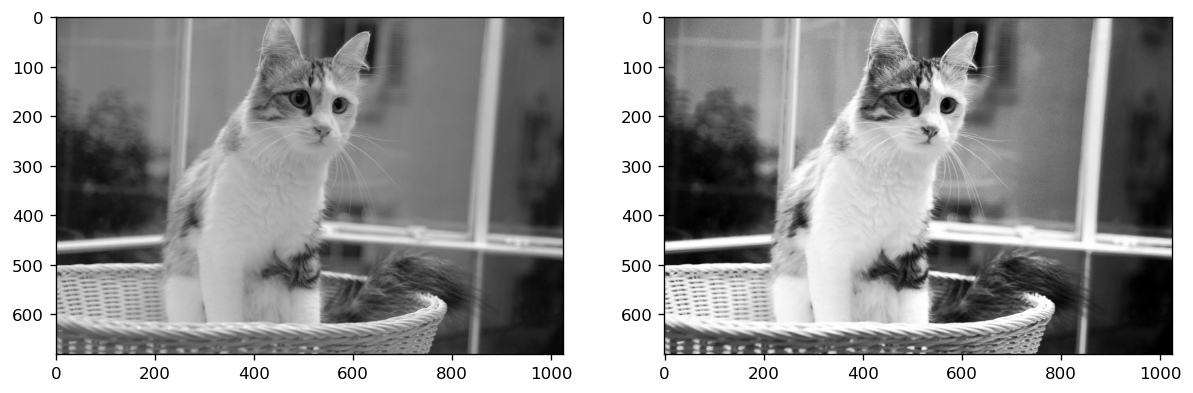

In [20]:
_, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=120)

ax[0].imshow(img, cmap='gray')
ax[1].imshow(new_image, cmap='gray')
plt.show()

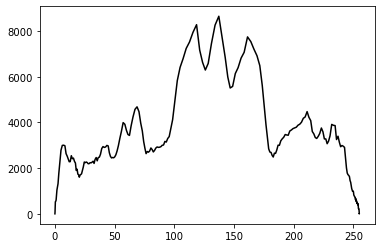

In [21]:
import numpy as np
from collections import Counter

hist = sorted(Counter(new_image.ravel()).items())

plt.plot(
    [x[0] for x in hist], [x[1] for x in hist], c='k'
)

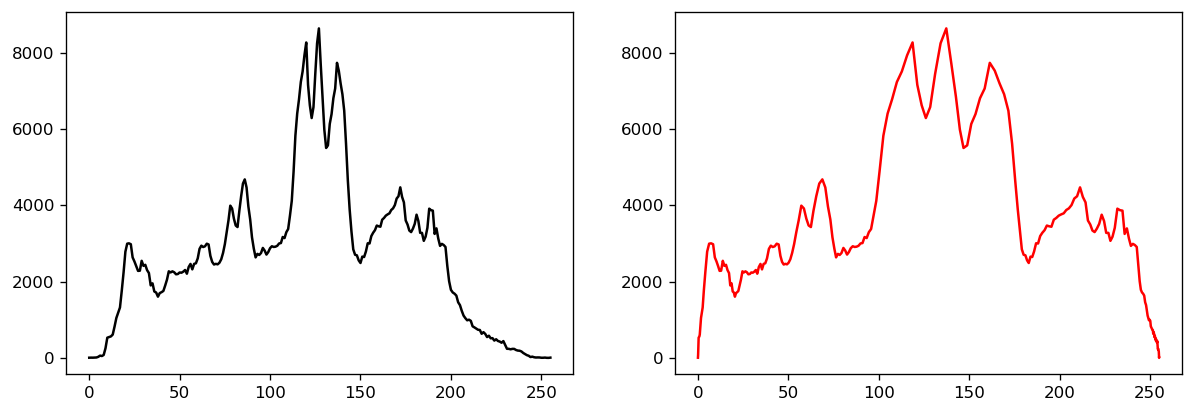

In [22]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, dpi=120, figsize=(12, 4))

hist = sorted(Counter(img.ravel()).items())

hist_enhanced = sorted(Counter(new_image.ravel()).items())

ax[0].plot(
    [x[0] for x in hist], [x[1] for x in hist], c='k'
)

ax[1].plot(
    [x[0] for x in hist_enhanced], 
    [x[1] for x in hist_enhanced], c='r'
)